In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count
len(cities)

629

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a2b836591e5c89e5a64916eab39b8364


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tungkang
City not found. Skipping...
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | mbandaka
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | staritsa
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | sakakah
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | akyab
Processing Record 19 of Set 1 | kirakira
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sabang

Processing Record 34 of Set 4 | muros
Processing Record 35 of Set 4 | riyadh
Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | codajas
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | mnogovershinnyy
Processing Record 42 of Set 4 | dangara
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | oyama
Processing Record 45 of Set 4 | olinda
Processing Record 46 of Set 4 | leningradskiy
Processing Record 47 of Set 4 | pullampadi
City not found. Skipping...
Processing Record 48 of Set 4 | okandja
City not found. Skipping...
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | pontianak
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | port-cartier
Processing Record 3 of Set 5 | halifax
Processing Record 4 of Set 5 | ochakiv
Processing Record 5 of Set 5 | caravel

City not found. Skipping...
Processing Record 21 of Set 8 | naze
Processing Record 22 of Set 8 | taksimo
Processing Record 23 of Set 8 | meiktila
Processing Record 24 of Set 8 | manicore
Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | abu kamal
Processing Record 27 of Set 8 | synya
Processing Record 28 of Set 8 | siwana
Processing Record 29 of Set 8 | sabana de torres
Processing Record 30 of Set 8 | coahuayana
Processing Record 31 of Set 8 | tooele
Processing Record 32 of Set 8 | asau
Processing Record 33 of Set 8 | kismayo
Processing Record 34 of Set 8 | south sioux city
Processing Record 35 of Set 8 | det udom
Processing Record 36 of Set 8 | yenotayevka
Processing Record 37 of Set 8 | dalby
Processing Record 38 of Set 8 | markapur
Processing Record 39 of Set 8 | shingu
Processing Record 40 of Set 8 | ugep
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | holme
Processing Record 43 of Set 8 | nhulunbuy
Processing Record 44 

Processing Record 11 of Set 12 | omboue
Processing Record 12 of Set 12 | yirol
City not found. Skipping...
Processing Record 13 of Set 12 | alabaster
Processing Record 14 of Set 12 | manthani
Processing Record 15 of Set 12 | domazlice
Processing Record 16 of Set 12 | quelimane
Processing Record 17 of Set 12 | maxixe
Processing Record 18 of Set 12 | mandalgovi
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | berlevag
Processing Record 21 of Set 12 | zonguldak
Processing Record 22 of Set 12 | koutiala
Processing Record 23 of Set 12 | chifeng
Processing Record 24 of Set 12 | quang ngai
Processing Record 25 of Set 12 | berezovka
Processing Record 26 of Set 12 | wuzhou
Processing Record 27 of Set 12 | alexandria
Processing Record 28 of Set 12 | xining
Processing Record 29 of Set 12 | dakar
Processing Record 30 of Set 12 | marsh harbour
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | barka kana
Processing Rec

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,78.28,81,100,11.88,BR,2021-01-27 18:57:52
1,Bluff,-46.6000,168.3333,50.00,86,99,15.01,NZ,2021-01-27 18:57:52
2,Rikitea,-23.1203,-134.9692,79.92,73,57,14.23,PF,2021-01-27 18:57:53
3,Lebu,-37.6167,-73.6500,61.41,65,100,10.33,CL,2021-01-27 18:57:53
4,Mbandaka,0.0487,18.2603,73.33,91,100,1.12,CD,2021-01-27 18:57:53
5,Te Anau,-45.4167,167.7167,46.87,77,46,5.37,NZ,2021-01-27 18:57:53
6,Ribeira Grande,38.5167,-28.7000,59.00,88,75,25.32,PT,2021-01-27 18:57:53
7,Staritsa,56.5075,34.9354,30.42,98,100,6.60,RU,2021-01-27 18:57:54
8,Ponta Do Sol,32.6667,-17.1000,62.60,88,20,8.05,PT,2021-01-27 18:57:54
9,Sakakah,29.9697,40.2064,64.40,34,0,8.05,SA,2021-01-27 18:57:54


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2021-01-27 18:57:52,-30.1811,-50.2056,78.28,81,100,11.88
1,Bluff,NZ,2021-01-27 18:57:52,-46.6000,168.3333,50.00,86,99,15.01
2,Rikitea,PF,2021-01-27 18:57:53,-23.1203,-134.9692,79.92,73,57,14.23
3,Lebu,CL,2021-01-27 18:57:53,-37.6167,-73.6500,61.41,65,100,10.33
4,Mbandaka,CD,2021-01-27 18:57:53,0.0487,18.2603,73.33,91,100,1.12
...,...,...,...,...,...,...,...,...,...
567,Heishan,CN,2021-01-27 18:59:31,41.6892,122.1128,15.87,91,100,14.83
568,Dalvik,IS,2021-01-27 18:59:31,65.9702,-18.5286,17.60,86,75,6.38
569,Fairbanks,US,2021-01-27 18:55:03,64.8378,-147.7164,-5.01,69,40,2.28
570,Lafia,NG,2021-01-27 18:59:32,8.4833,8.5167,83.95,14,3,2.19


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

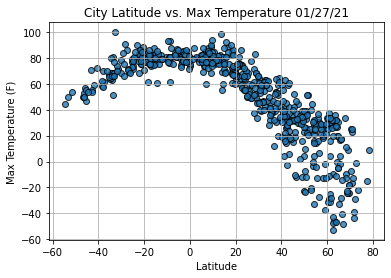

In [22]:
# Import time module
import time

#Build th scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor = "black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

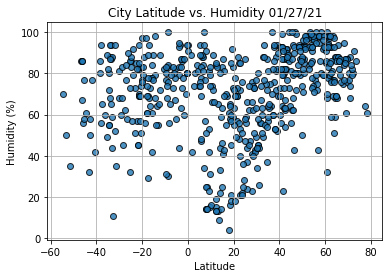

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()